In [80]:
import matplotlib.pyplot as plt
import re
import os

In [81]:
##FOLDER_PATH = "C:\\Users\\kevin\\OneDrive\\Desktop\\Kevin12345Mc"

In [82]:
FOLDER_PATH = "C:\\Users\\km154756\\TournamentTracker\\data\\Kevin12345Mc"

In [83]:
tournament_data = {}
total_hands_played = 0
total_tournament_cost = 0

In [84]:
hand_pattern = re.compile(
    r"PokerStars Hand #(\d+): Tournament #(\d+), (\$\d+\.\d+\+\$\d+\.\d+) USD .*? - (\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2} \w+)"
)

chip_pattern = re.compile(
    r"Kevin12345Mc \((\d+) in chips\)"
)

In [85]:
existing_tournaments = set(tournament_data.keys())

In [86]:
for file_name in os.listdir(FOLDER_PATH):
    if file_name.endswith(".txt"):
        file_path = os.path.join(FOLDER_PATH, file_name)
        
        with open(file_path, "r", encoding="utf-8") as file:
            current_hand = None
            current_tournament = None
            current_chips = None

            for line in file:
                match_hand = hand_pattern.search(line)
                match_chips = chip_pattern.search(line)

                if match_hand:
                    ##tournament_number = match_hand.group(2)

                    
                    ##if tournament_number in existing_tournaments:
                    ##    break

                    current_hand = match_hand.group(1)
                    current_tournament = match_hand.group(2)
                    current_tournament_cost = match_hand.group(3)
                    current_hand_time = match_hand.group(4)
                    current_chips = None

                elif match_chips:
                    current_chips = match_chips.group(1)

                
                if current_hand and current_chips:
                    if current_tournament not in tournament_data:
                        tournament_data[current_tournament] = {"hand_number": [], "start_chips": [], "cost": current_tournament_cost}

                    tournament_data[current_tournament]["hand_number"].append(int(current_hand))
                    tournament_data[current_tournament]["start_chips"].append(int(current_chips))
                    
                    current_hand = None
                    current_chips = None

                    existing_tournaments.add(current_tournament)

print("All new tournaments have been read!")


All new tournaments have been read!


In [87]:
for tournament, data in tournament_data.items():
    total_hands_played += len(data["hand_number"])
    cost = data["cost"]
    
    cost_parts = cost.split('+')
    cost_value = float(cost_parts[0][1:]) + float(cost_parts[1][1:])
    total_tournament_cost += cost_value
    
print(total_hands_played)
average_tournament_cost = total_tournament_cost / len(tournament_data)

1708


In [88]:
all_hands_played = 0

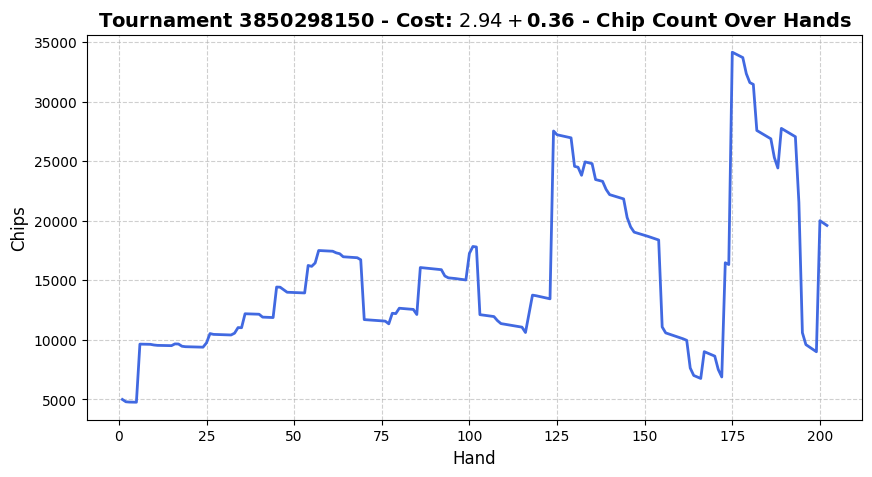

Hands Played this tournament: 202


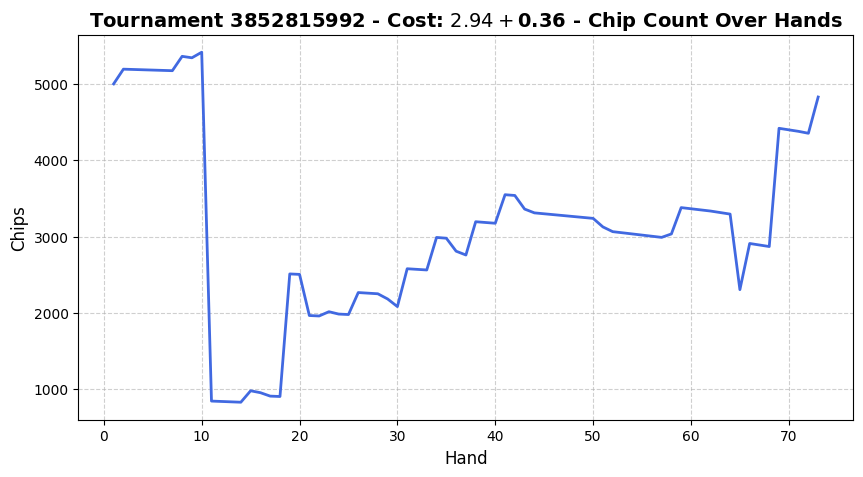

Hands Played this tournament: 73


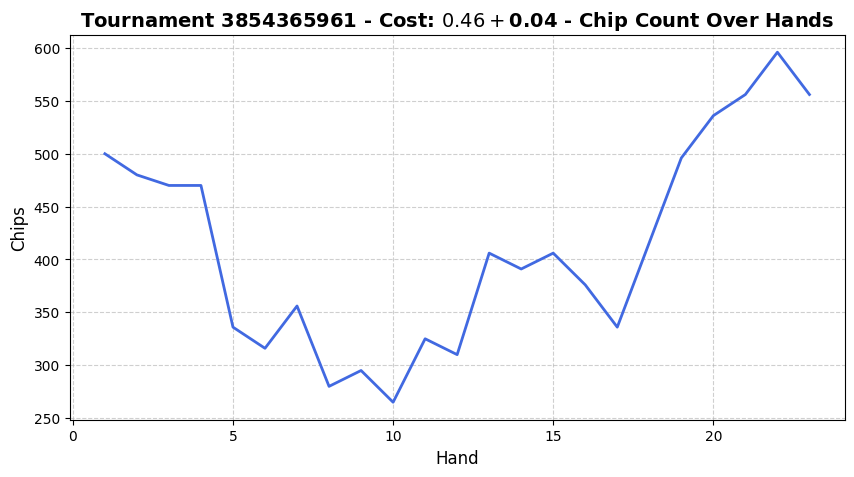

Hands Played this tournament: 23


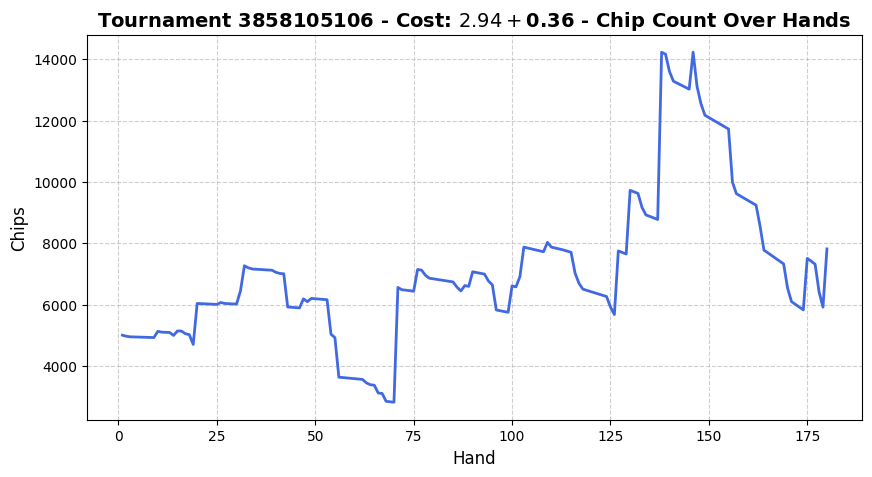

Hands Played this tournament: 180


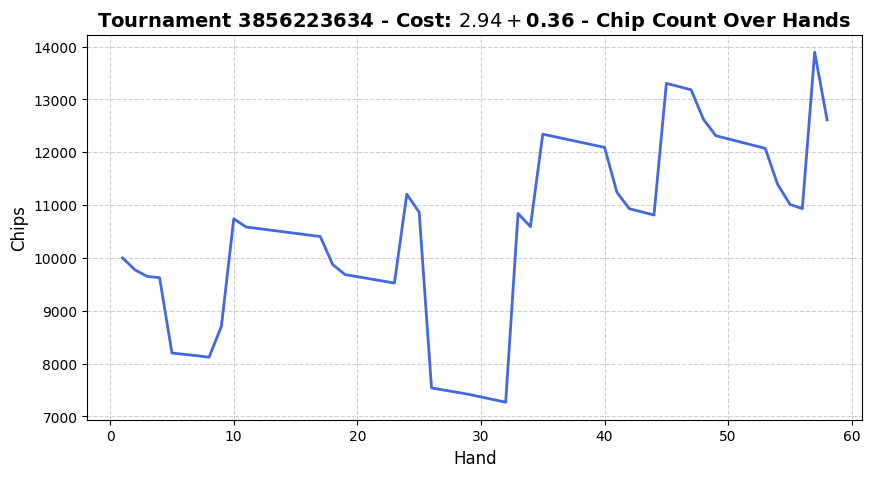

Hands Played this tournament: 58


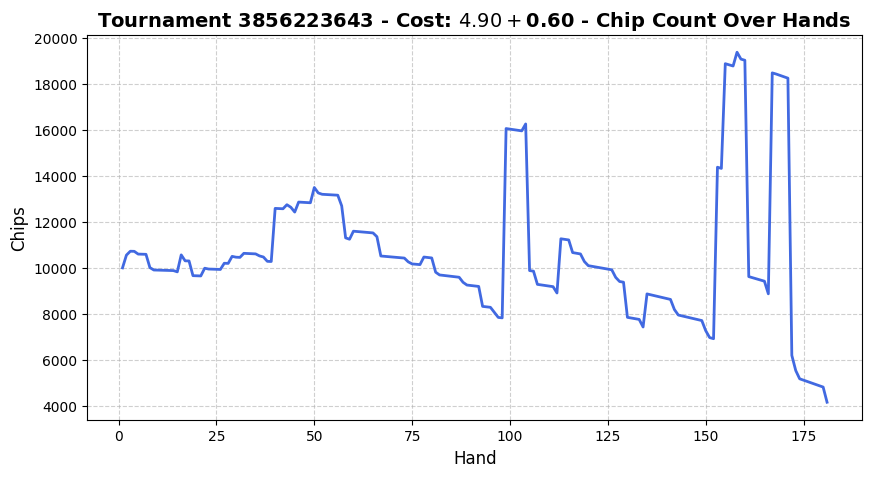

Hands Played this tournament: 181


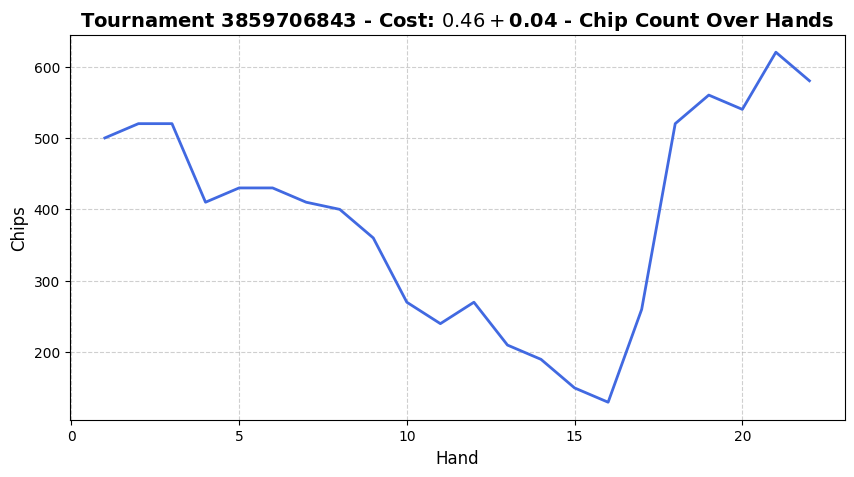

Hands Played this tournament: 22


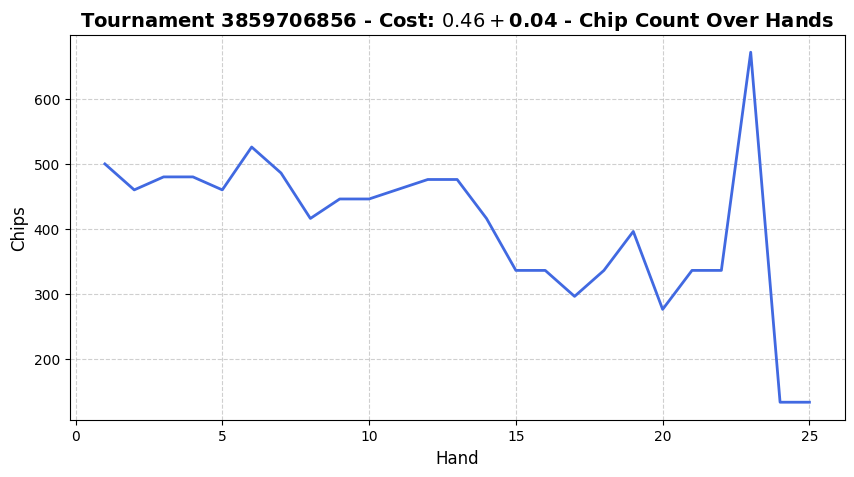

Hands Played this tournament: 25


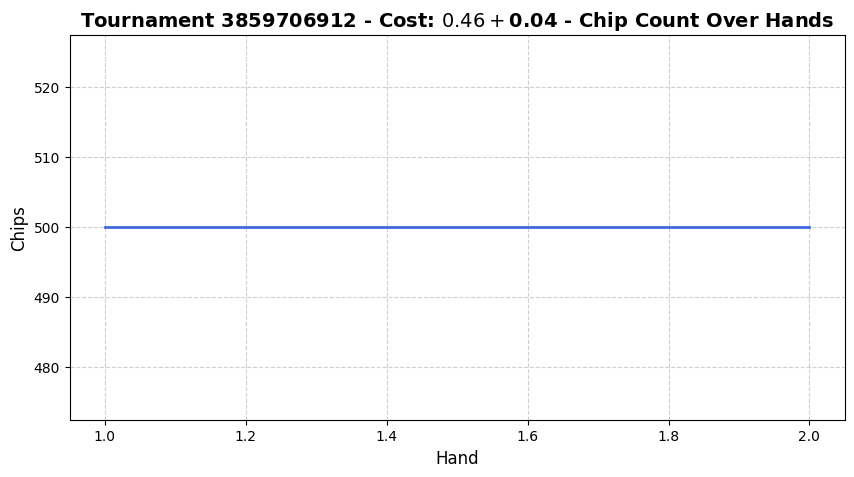

Hands Played this tournament: 2


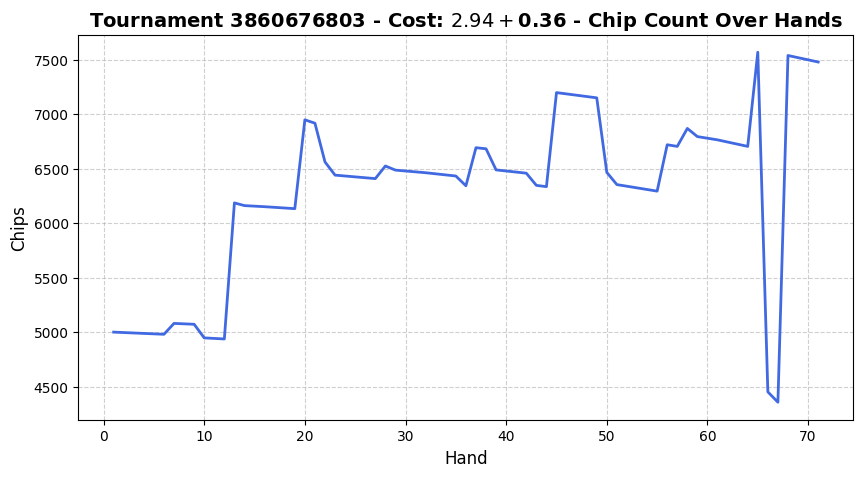

Hands Played this tournament: 71


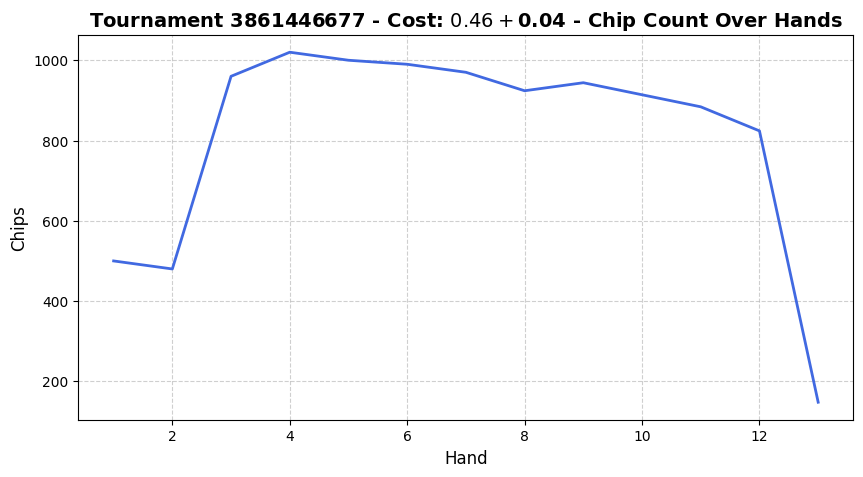

Hands Played this tournament: 13


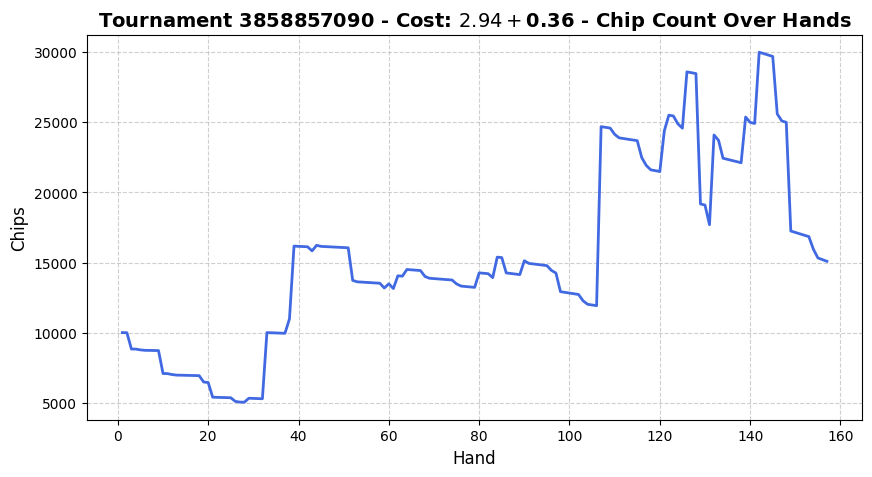

Hands Played this tournament: 157


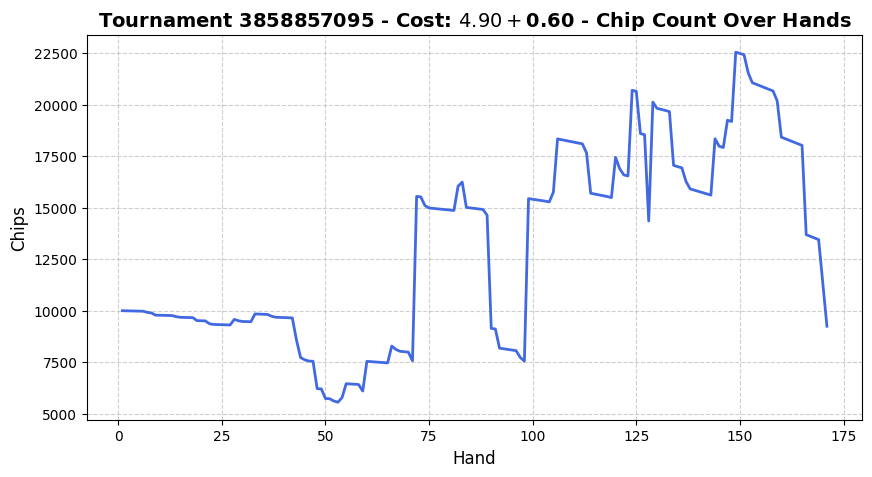

Hands Played this tournament: 171


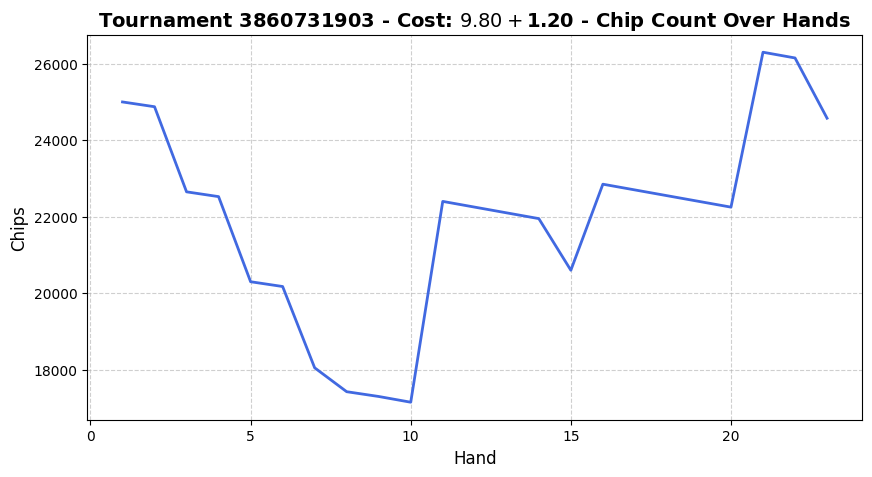

Hands Played this tournament: 23


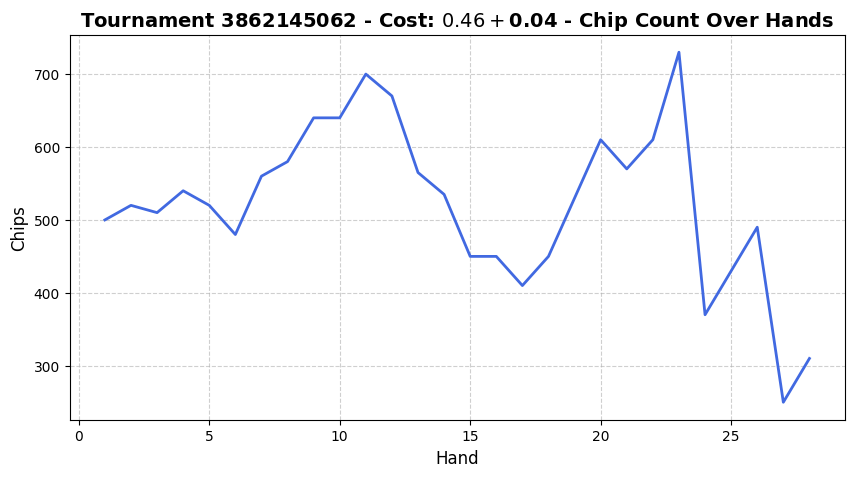

Hands Played this tournament: 28


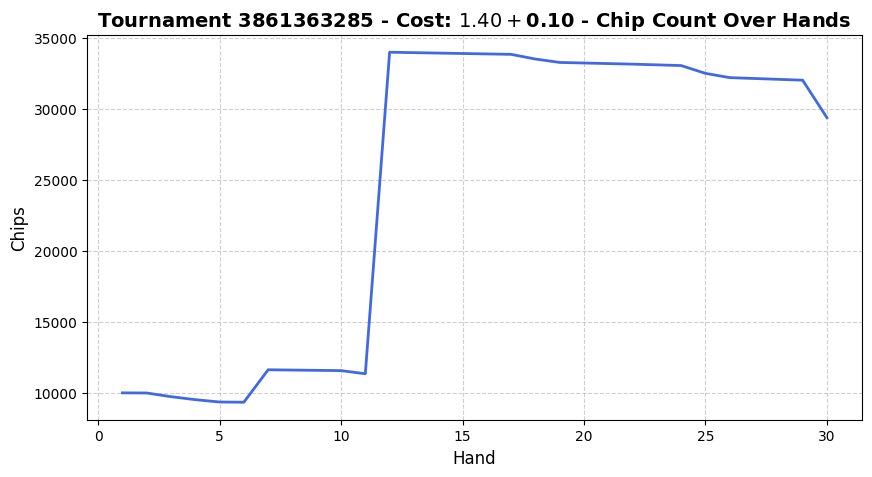

Hands Played this tournament: 30


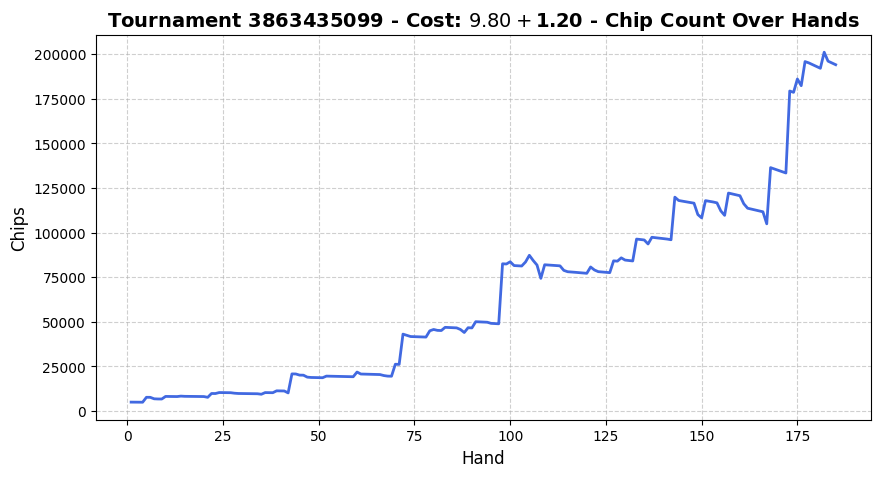

Hands Played this tournament: 185


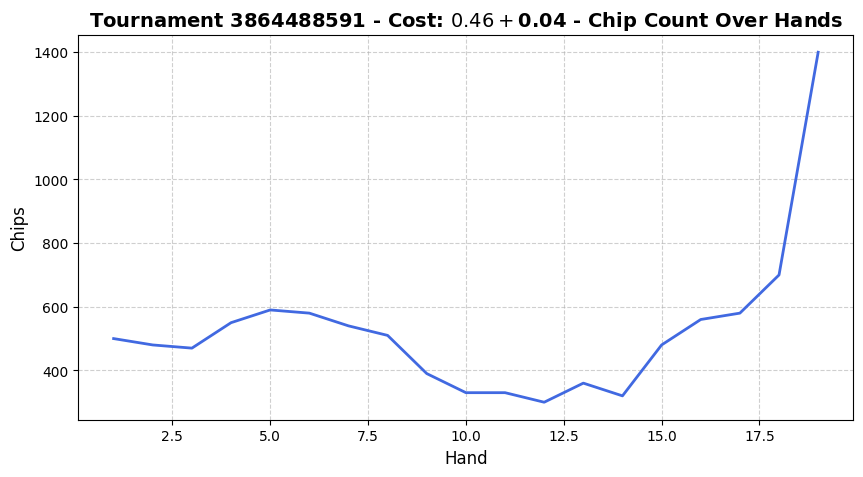

Hands Played this tournament: 19


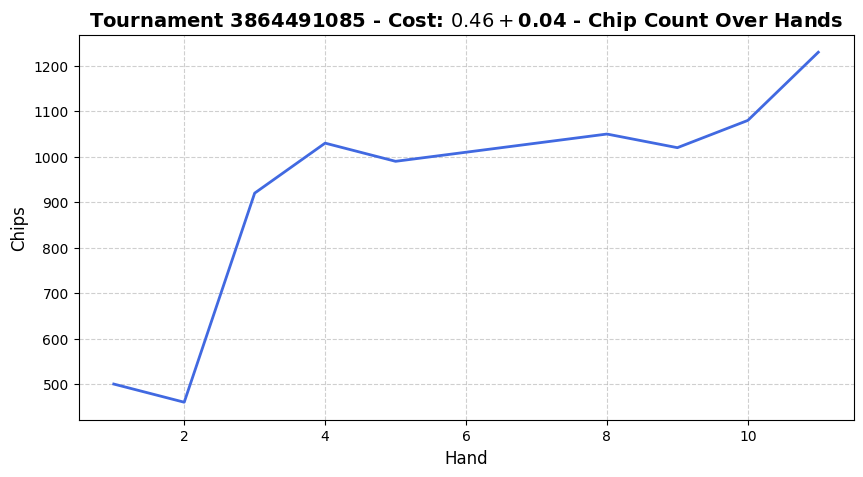

Hands Played this tournament: 11


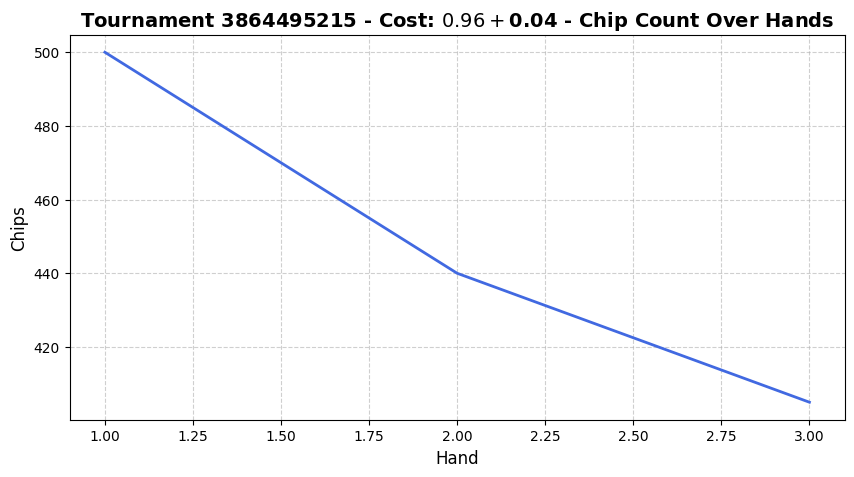

Hands Played this tournament: 3


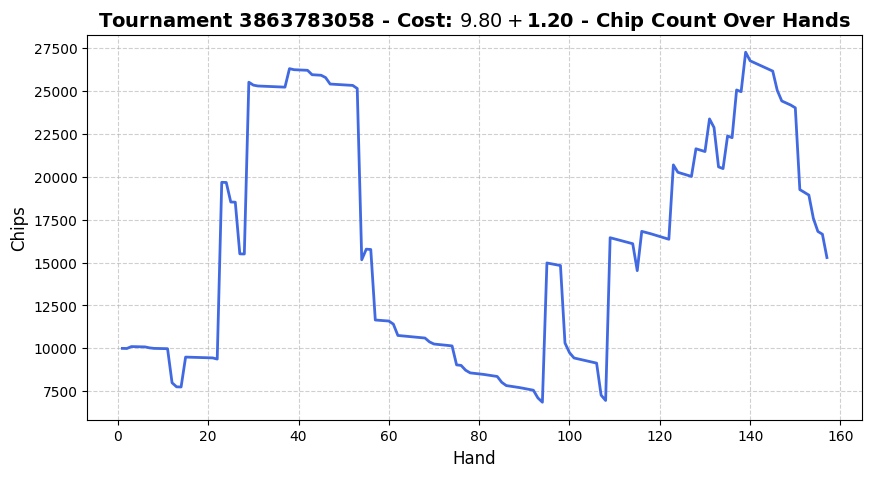

Hands Played this tournament: 157


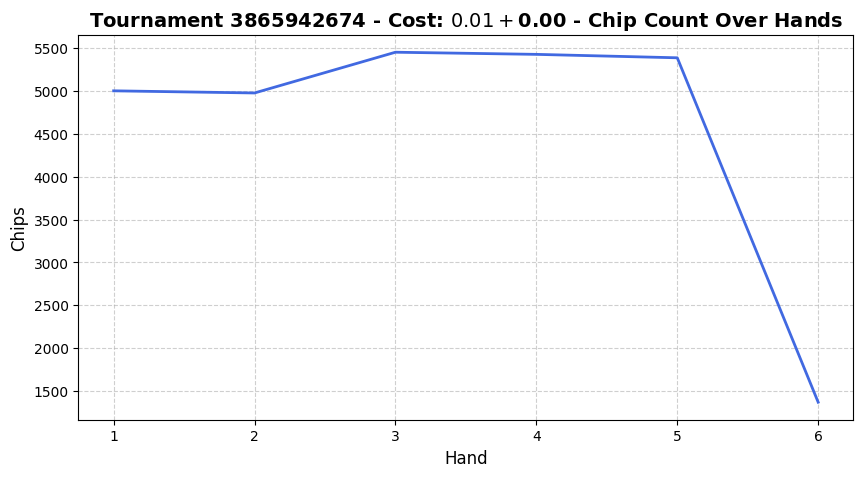

Hands Played this tournament: 6


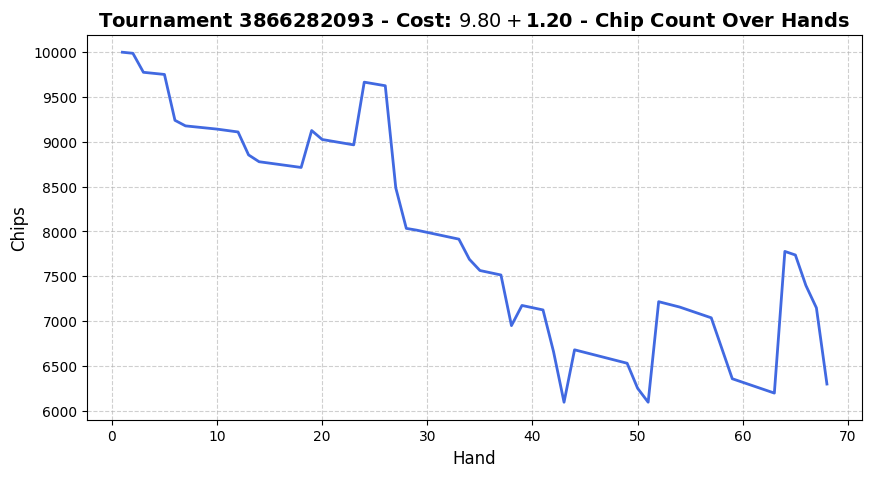

Hands Played this tournament: 68
Tournaments Played: 23
Total Hands Played: 1708
Total Tournament Cost: $81.31
Average Tournament Cost: 3.54


In [89]:
for tournament, data in tournament_data.items():
    raw_x = data["hand_number"]
    y = data["start_chips"]
    
    all_hands_played += len(raw_x)
    
    x = list(range(1, len(raw_x) + 1))
    
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, linestyle="-", color="royalblue", linewidth=2, markersize=6, label="Chips Over Hands")

    plt.grid(True, linestyle="--", alpha=0.6)

    plt.title(f"Tournament {tournament} - Cost: {data['cost']} - Chip Count Over Hands", fontsize=14, fontweight="bold")
    plt.xlabel("Hand", fontsize=12)
    plt.ylabel("Chips", fontsize=12)
    
    plt.show()
    print(f"Hands Played this tournament: {len(raw_x)}")
print(f"Tournaments Played: {len(tournament_data)}")
print(f"Total Hands Played: {all_hands_played}")
print(f"Total Tournament Cost: ${total_tournament_cost:.2f}")
print(f"Average Tournament Cost: {average_tournament_cost:.2f}")